In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [3]:
fares = pd.read_csv('data/trip_fare/trip_fare_11.csv')

fares.shape

(14388451, 11)

In [4]:
fares.tail(5)

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
14388446,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,CMT,2013-11-25 04:44:00,CRD,52.0,0.0,0.5,5.0,5.33,62.83
14388447,926291789F6E904E920508D584D93301,F7D2634D82BEFEFCEAFCD9D7A5C2846A,CMT,2013-11-25 08:25:59,CRD,6.0,0.0,0.5,2.0,0.00,8.50
14388448,B5A2A6106AC22D527F0DAF3E68E6E320,E1A4A83FA1BEA573C823984082C6BFED,CMT,2013-11-25 14:15:33,CRD,13.0,0.0,0.5,2.7,0.00,16.20
14388449,BE214ADD26750400C52407093C441701,D9573F449F1B17818F9485EB5E319E1F,CMT,2013-11-25 04:42:24,CRD,7.5,0.5,0.5,1.7,0.00,10.20
14388450,D854EEDDAD7974C3912027ED7AE8F606,8BF0E72CAB26DAC5F1BC7E052DC7CF63,CMT,2013-11-25 08:02:10,CRD,9.0,0.0,0.5,1.9,0.00,11.40


In [5]:
trips = pd.read_csv('data/trip_data/trip_data_11.csv')

trips.shape

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_10691/2752665082.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('data/trip_data/trip_data_11.csv')


(14388451, 14)

In [6]:
trips.tail(5)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
14388446,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,CMT,2,N,2013-11-25 04:44:00,2013-11-25 05:06:38,1,1357,18.5,-73.949677,40.776268,-73.783241,40.643860
14388447,926291789F6E904E920508D584D93301,F7D2634D82BEFEFCEAFCD9D7A5C2846A,CMT,1,N,2013-11-25 08:25:59,2013-11-25 08:31:31,1,332,0.8,-73.975464,40.755527,-73.975281,40.763924
14388448,B5A2A6106AC22D527F0DAF3E68E6E320,E1A4A83FA1BEA573C823984082C6BFED,CMT,1,N,2013-11-25 14:15:33,2013-11-25 14:32:22,1,1009,2.5,-74.003677,40.748505,-74.001793,40.721375
14388449,BE214ADD26750400C52407093C441701,D9573F449F1B17818F9485EB5E319E1F,CMT,1,N,2013-11-25 04:42:24,2013-11-25 04:46:52,1,268,2.1,-73.974876,40.782822,-73.986580,40.757378
14388450,D854EEDDAD7974C3912027ED7AE8F606,8BF0E72CAB26DAC5F1BC7E052DC7CF63,CMT,1,N,2013-11-25 08:02:10,2013-11-25 08:12:31,1,621,1.5,-73.956795,40.770844,-73.970047,40.752743


In [6]:
trips.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 rate_code               int64
 store_and_fwd_flag     object
 pickup_datetime        object
 dropoff_datetime       object
 passenger_count         int64
 trip_time_in_secs       int64
 trip_distance         float64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
dtype: object

In [7]:
# some columns have leading whitespace so lets remove it
trips.columns = [i.strip() for i in trips.columns]
trips.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [8]:
# some columns have leading whitespace so lets remove it
fares.columns = [i.strip() for i in fares.columns]
fares.columns

Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [9]:
trips = pd.merge(trips, fares, on=['medallion', 'hack_license', 'vendor_id', 'pickup_datetime'], how="left")
trips.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,CMT,1,N,2013-11-25 15:53:33,2013-11-25 16:00:51,1,437,0.6,...,40.752968,-73.985756,40.762684,CRD,6.0,1.0,0.5,1.0,0.0,8.5
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,CMT,1,N,2013-11-25 15:24:41,2013-11-25 15:30:18,1,336,0.5,...,40.764828,-73.982132,40.758888,CRD,5.5,0.0,0.5,3.0,0.0,9.0
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,CMT,1,N,2013-11-25 09:43:42,2013-11-25 10:02:57,1,1154,3.3,...,40.762508,-74.006851,40.719582,CRD,15.0,0.0,0.5,2.0,0.0,17.5
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,CMT,1,N,2013-11-25 06:49:58,2013-11-25 07:04:22,1,864,3.8,...,40.744480,-74.016060,40.717297,CRD,14.0,0.0,0.5,2.9,0.0,17.4
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,CMT,1,N,2013-11-25 10:02:12,2013-11-25 10:17:15,1,902,2.2,...,40.780964,-73.981628,40.777977,CRD,12.0,0.0,0.5,2.0,0.0,14.5


In [10]:
# dont need the fares dataset aymore
del(fares)

# Data dictionary
#### https://learn.microsoft.com/en-us/azure/open-datasets/dataset-taxi-yellow?tabs=azureml-opendatasets

# vendor_id

In [11]:
# 2 vendor_id
# VTS - VeriFone Transportation Systems
# CMT - Creative Mobile Technologies

trips.vendor_id.value_counts(dropna=False)

vendor_id
VTS    7251507
CMT    7136944
Name: count, dtype: int64

# rate_code

In [12]:
# https://www.nyc.gov/assets/tlc/downloads/pdf/taxi_information.pdf

# The final rate code in effect at the end of the trip. 
# 1= Standard rate; 
# 2= JFK; ?and manhattan?
# 3= Newark; 
# 4= Nassau or Westchester; 
# 5= Negotiated fare; ?ooc negotiated rate?
# 6= Group ride.

# 0,7,8,9,210? to be removed

trips.rate_code.value_counts(dropna=False).sort_index()

rate_code
0          1242
1      14074886
2        246583
3         21953
4          4470
5         39145
6           148
7             4
8             3
9             2
10            2
210          13
Name: count, dtype: int64

# store_and_fwd_flag

In [14]:
# This flag indicates whether the trip record was held in vehicle memory 
# before sending to the vendor, also known as “store and forward,” 
# because the vehicle did not have a connection to the server. 
# Y= store and forward trip; N= not a store and forward trip.

trips.store_and_fwd_flag.value_counts(dropna=False).sort_index()

store_and_fwd_flag
N      6999327
Y       136517
NaN    7252607
Name: count, dtype: int64

# passenger_count

In [15]:
# number of passengers in the taxi
# remove where 0 or 7+
trips.passenger_count.value_counts(dropna=False).sort_index()

passenger_count
0           869
1      10085655
2       2027512
3        621673
4        301112
5        789652
6        561945
7            12
8             8
9            11
208           2
Name: count, dtype: int64

# fare_amount

In [16]:
# min charge for a cab is 2.50
trips.fare_amount.value_counts(dropna=False).sort_index()

fare_amount
2.50      60383
2.60          4
2.70          1
2.75          1
2.80          1
          ...  
468.16        1
477.76        1
477.83        1
488.86        2
500.00        7
Name: count, Length: 1598, dtype: int64

In [17]:
trips[trips['fare_amount']==2.5].head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
333,9406D2C34715E1DA10AD4D4DDADF4DA5,0602DFD837433635FE860BDE2F14BC3A,VTS,1,NaN,2013-11-04 20:16:00,2013-11-04 20:16:00,1,0,0.00,...,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.0,0.0,3.5
430,72BE95904DF002C8CA2077C571871244,6ECE3851E9D21ECF9786E198361E0366,VTS,1,NaN,2013-11-13 22:15:00,2013-11-13 22:15:00,1,0,0.07,...,0.000000,0.000000,0.000000,CSH,2.5,0.5,0.5,0.0,0.0,3.5
1144,B0D8DBE78A60485B9BFF22EE1A3AF081,C951257FE6744F083FBA037AC217F84D,VTS,1,NaN,2013-11-07 23:19:00,2013-11-07 23:19:00,1,0,0.05,...,40.721153,0.000000,0.000000,CSH,2.5,0.5,0.5,0.0,0.0,3.5
1165,670E230FA9EDFF1BE3D74F74737302E5,BF9867E68C9D74B51BDA13F97B8460FD,CMT,1,N,2013-11-25 00:07:10,2013-11-25 00:07:14,1,3,0.00,...,40.763844,-73.922836,40.763844,CRD,2.5,0.5,0.5,21.0,0.0,24.5
1255,9D5F86698EC694595E69AFC890A97176,960C250DD2D8D7C13A612E1DC71AF4C2,VTS,1,NaN,2013-11-07 23:26:00,2013-11-07 23:26:00,1,0,0.00,...,0.000000,0.000000,0.000000,CSH,2.5,0.5,0.5,0.0,0.0,3.5


# Dropping rows with invalid values

In [22]:
# Drop rows on conditions
# passenger_count = 0
# trip_distance = 0
# trip_time_in_secs = 0

# filter on specified square defined in coming cells
# pickup_longitude 
# pickup_latitude
# dropoff_longitude
# dropoff_latitude

In [18]:
print("Rows with passenger_count=0:", len(trips[trips['passenger_count']==0]))
print("Rows with passenger_count>6:", len(trips[trips['passenger_count']>6]))
print("Rows with trip_time_in_secs=0:", len(trips[trips['trip_time_in_secs']==0]))
print("Rows with trip_distance=0:", len(trips[trips['trip_distance']==0.0]))
print("Rows with rate_code in [0,7,8,9,210]:", len(trips[trips['rate_code'].isin([0,7,8,9,210])]))



Rows with passenger_count=0: 869
Rows with passenger_count>6: 33
Rows with trip_time_in_secs=0: 41388
Rows with trip_distance=0: 77304
Rows with rate_code in [0,7,8,9,210]: 1264


In [19]:
# set bounds for longitude and latitude
# manually picked points from google maps as 4 corners of square surrounding new york

# top left 40.93, -74.3
# bottom left : 40.47, -74.3
# top right 40.93, -73.69
# bottom right 40.47, -73.69

# longitude:  -74.3 < x < -73.69
# latitude: 40.47 < x < 40.93

# count rows with undesirable lat and longs for pickup
print("Rows with pickup_longitude < -74.3 :", len(trips[trips['pickup_longitude'] < -74.3]))
print("Rows with pickup_longitude > -73.69 :", len(trips[trips['pickup_longitude'] > -73.69]))
print("Rows with pickup_longitude = 0 :", len(trips[trips['pickup_longitude']==0.0]))
print()
print("Rows with pickup_latitude < 40.47 :", len(trips[trips['pickup_latitude'] < 40.47]))
print("Rows with pickup_latitude > 40.93 :", len(trips[trips['pickup_latitude'] > 40.93]))
print("Rows with pickup_latitude = 0 :", len(trips[trips['pickup_latitude'] == 0.0]))
print()

# count rows with undesirable lat and longs for dropoff
print("Rows with dropoff_longitude < -74.3 :", len(trips[trips['dropoff_longitude'] < -74.3]))
print("Rows with dropoff_longitude > -73.69 :", len(trips[trips['dropoff_longitude'] > -73.69]))
print("Rows with dropoff_longitude = 0 :", len(trips[trips['dropoff_longitude']==0.0]))
print()
print("Rows with dropoff_latitude < 40.47 :", len(trips[trips['dropoff_latitude'] < 40.47]))
print("Rows with dropoff_latitude > 40.93 :", len(trips[trips['dropoff_latitude'] > 40.93]))
print("Rows with dropoff_latitude = 0 :", len(trips[trips['dropoff_latitude'] == 0.0]))

Rows with pickup_longitude < -74.3 : 654
Rows with pickup_longitude > -73.69 : 274970
Rows with pickup_longitude = 0 : 273786

Rows with pickup_latitude < 40.47 : 274223
Rows with pickup_latitude > 40.93 : 1123
Rows with pickup_latitude = 0 : 273786

Rows with dropoff_longitude < -74.3 : 1053
Rows with dropoff_longitude > -73.69 : 286637
Rows with dropoff_longitude = 0 : 282855

Rows with dropoff_latitude < 40.47 : 283363
Rows with dropoff_latitude > 40.93 : 3190
Rows with dropoff_latitude = 0 : 282853


In [20]:
# invalid values to exlude
passenger_count_indices_to_drop = trips[trips['passenger_count']==0].index.tolist()
high_passenger_count_indices_to_drop = trips[trips['passenger_count']>6].index.tolist()
trip_time_in_secs_indices_to_drop = trips[trips['trip_time_in_secs']==0].index.tolist()
trip_distance_indices_to_drop = trips[trips['trip_distance']==0.0].index.tolist()
rate_code_indices_to_drop = trips[trips['rate_code'].isin([0,7,8,9,210])].index.tolist()

# geo locations for pickups to exclude, any trip that was a pickup outside a square boundary of the city
pickup_long_indices_to_drop_1 = trips[trips['pickup_longitude'] < -74.3].index.tolist()
pickup_long_indices_to_drop_2 = trips[trips['pickup_longitude'] > -73.69].index.tolist()
pickup_lat_indices_to_drop_1 = trips[trips['pickup_latitude'] < 40.47].index.tolist()
pickup_lat_indices_to_drop_2 = trips[trips['pickup_latitude'] > 40.93].index.tolist()

# geo locations for dropoffs to exclude, any trip that was a pickup outside a square boundary of the city
dropoff_long_indices_to_drop_1 = trips[trips['dropoff_longitude'] < -74.3].index.tolist()
dropoff_long_indices_to_drop_2 = trips[trips['dropoff_longitude'] > -73.69].index.tolist()
dropoff_lat_indices_to_drop_1 = trips[trips['dropoff_latitude'] < 40.47].index.tolist()
dropoff_lat_indices_to_drop_2 = trips[trips['dropoff_latitude'] > 40.93].index.tolist()

indices_to_drop = list(set(passenger_count_indices_to_drop + 
                           high_passenger_count_indices_to_drop +
                           trip_time_in_secs_indices_to_drop + 
                           trip_distance_indices_to_drop + 
                           rate_code_indices_to_drop +
                          
                           pickup_long_indices_to_drop_1 +
                           pickup_long_indices_to_drop_2 +
                          
                           pickup_lat_indices_to_drop_1 +
                           pickup_lat_indices_to_drop_2 +

                           dropoff_long_indices_to_drop_1 +
                           dropoff_long_indices_to_drop_2 +

                           dropoff_lat_indices_to_drop_1 +
                           dropoff_lat_indices_to_drop_2
                          ))

print(f"Distinct rows to be dropped: {len(indices_to_drop)}")

Distinct rows to be dropped: 354401


In [21]:
df = trips[~trips.index.isin(indices_to_drop)]

del(trips)

df.shape

(14034050, 21)

In [22]:
# clean date and time
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df[['pickup_datetime', 'dropoff_datetime']].dtypes

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object

In [37]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_month'] = df['pickup_datetime'].dt.day
df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()

df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_hour,pickup_day_of_month,pickup_day_of_week,dropoff_hour
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,CMT,1,N,2013-11-25 15:53:33,2013-11-25 16:00:51,1,437,0.6,...,6.0,1.0,0.5,1.0,0.0,8.5,15,25,Monday,16
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,CMT,1,N,2013-11-25 15:24:41,2013-11-25 15:30:18,1,336,0.5,...,5.5,0.0,0.5,3.0,0.0,9.0,15,25,Monday,15
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,CMT,1,N,2013-11-25 09:43:42,2013-11-25 10:02:57,1,1154,3.3,...,15.0,0.0,0.5,2.0,0.0,17.5,9,25,Monday,10
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,CMT,1,N,2013-11-25 06:49:58,2013-11-25 07:04:22,1,864,3.8,...,14.0,0.0,0.5,2.9,0.0,17.4,6,25,Monday,7
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,CMT,1,N,2013-11-25 10:02:12,2013-11-25 10:17:15,1,902,2.2,...,12.0,0.0,0.5,2.0,0.0,14.5,10,25,Monday,10


In [44]:
total_trips_per_hour = df.groupby('pickup_hour')['medallion'].count().reset_index().rename(columns={'medallion': 'trips'})
total_trips_per_hour

,pickup_hour,trips
0,0,563073
1,1,445510
2,2,321949
3,3,234694
4,4,170678
5,5,144863
6,6,290124
7,7,502581
8,8,606295
9,9,635626


<Axes: xlabel='pickup_hour', ylabel='trips'>

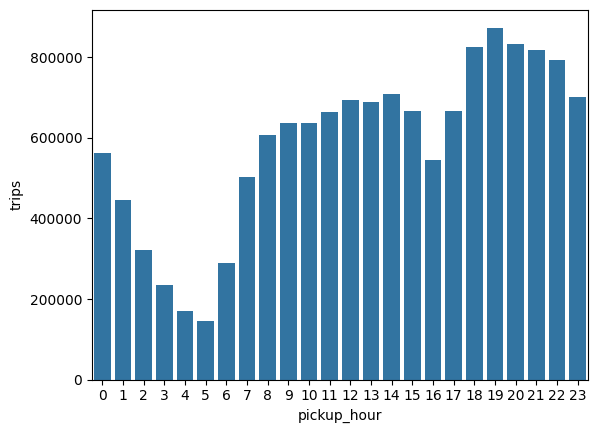

In [45]:
sns.barplot(data=total_trips_per_hour,
           x='pickup_hour', y='trips')

In [ ]:
df.groupby('pickup_hour')['medallion'].count().reset_index().rename(columns={'medallion': 'trips'})

In [ ]:
df['grouped_location'] = 

In [ ]:
pickup_location_counts = df['pickup_longitude'].round(3).astype(str) + ' , ' + df['pickup_latitude'].round(3).astype(str).value_counts().reset_index()
pickup_location_counts

In [46]:
df.dtypes

medallion                      object
hack_license                   object
vendor_id                      object
rate_code                       int64
store_and_fwd_flag             object
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
trip_time_in_secs               int64
trip_distance                 float64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
payment_type                   object
fare_amount                   float64
surcharge                     float64
mta_tax                       float64
tip_amount                    float64
tolls_amount                  float64
total_amount                  float64
pickup_hour                     int32
pickup_day_of_month             int32
pickup_day_of_week             object
dropoff_hour                    int32
dtype: object

In [ ]:
print()

# Exploratory Analysis
1. What are busiest locations and hours?
2. How are passengers per trip, payment type, fare and tip amounts distributed?
3. How do times and fares vary by trips?
4. Is it possible to characterise taxi drivers based on work hours and how much they make?

In [42]:
fares.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,CMT,2013-11-25 15:53:33,CRD,6.0,1.0,0.5,1.0,0.0,8.5
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,CMT,2013-11-25 15:24:41,CRD,5.5,0.0,0.5,3.0,0.0,9.0
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,CMT,2013-11-25 09:43:42,CRD,15.0,0.0,0.5,2.0,0.0,17.5
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,CMT,2013-11-25 06:49:58,CRD,14.0,0.0,0.5,2.9,0.0,17.4
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,CMT,2013-11-25 10:02:12,CRD,12.0,0.0,0.5,2.0,0.0,14.5
